##DATA EXPLORATION

In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,log_loss

In [83]:
data = pd.read_csv("/content/ONLINE_PAYMENT.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624865 entries, 0 to 5624864
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 472.1+ MB


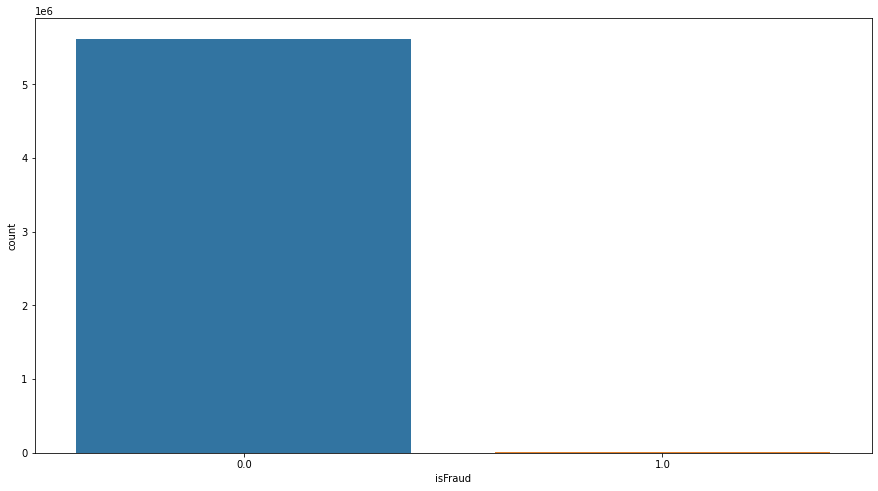

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['isFraud'],data=data)

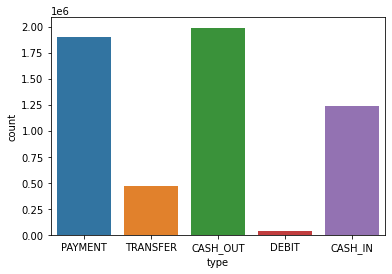

In [86]:
sns.countplot(x=data['type'],data=data)

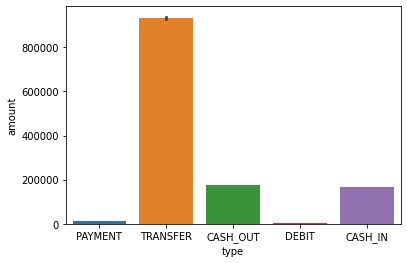

In [87]:
sns.barplot(x=data['type'],y=data["amount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


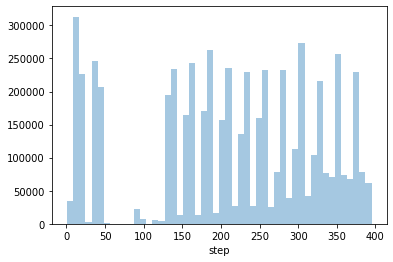

In [88]:
sns.distplot(a=data['step'],kde=False)

##DATA PREPROCESSING

In [89]:
data =data.drop(["isFlaggedFraud"],axis=1)

In [90]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
dtype: int64

In [91]:
data.dropna(subset=["isFraud","newbalanceDest"],axis=0,inplace=True)

In [92]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [93]:
data["isFraud"]=data["isFraud"].astype("int32")

In [94]:
data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [95]:
print(data["nameOrig"].unique())
print(data["nameOrig"].value_counts())

['C1231006815' 'C1666544295' 'C1305486145' ... 'C1773997830' 'C806144160'
 'C1384666833']
C1065307291    3
C1976208114    3
C1677795071    3
C1530544995    3
C2098525306    3
              ..
C1001133085    1
C1993498442    1
C1328496090    1
C1809332753    1
C1384666833    1
Name: nameOrig, Length: 5617556, dtype: int64


In [96]:
print(data["nameDest"].unique())
print(data["nameDest"].value_counts())

['M1979787155' 'M2044282225' 'C553264065' ... 'M68972574' 'M1980927630'
 'M239476399']
C1286084959    112
C985934102     107
C665576141     105
C2083562754    101
C248609774     101
              ... 
M1551909456      1
M1449170527      1
M1766095821      1
M352375002       1
M239476399       1
Name: nameDest, Length: 2401368, dtype: int64


In [97]:
converter = LabelEncoder()
data["type"] = converter.fit_transform(data["type"])
data["nameDest"] = converter.fit_transform(data["nameDest"])
data["nameOrig"] = converter.fit_transform(data["nameOrig"])


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624864 entries, 0 to 5624863
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int32  
dtypes: float64(5), int32(1), int64(4)
memory usage: 450.6 MB


In [99]:
data['isFraud'].unique()

array([0, 1], dtype=int32)

In [100]:
data['isFraud'].value_counts()

0    5620463
1       4401
Name: isFraud, dtype: int64

##FEATURE SELECTION

In [101]:
X1=data.drop(["isFraud"],axis=1)
Y1=data["isFraud"]


In [102]:
features = X1.columns
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X1,Y1)

ExtraTreesClassifier()

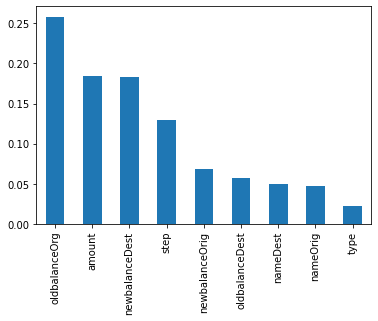

In [103]:
imp=pd.Series(model.feature_importances_,index=features)
imp.nlargest(31).plot(kind='bar')

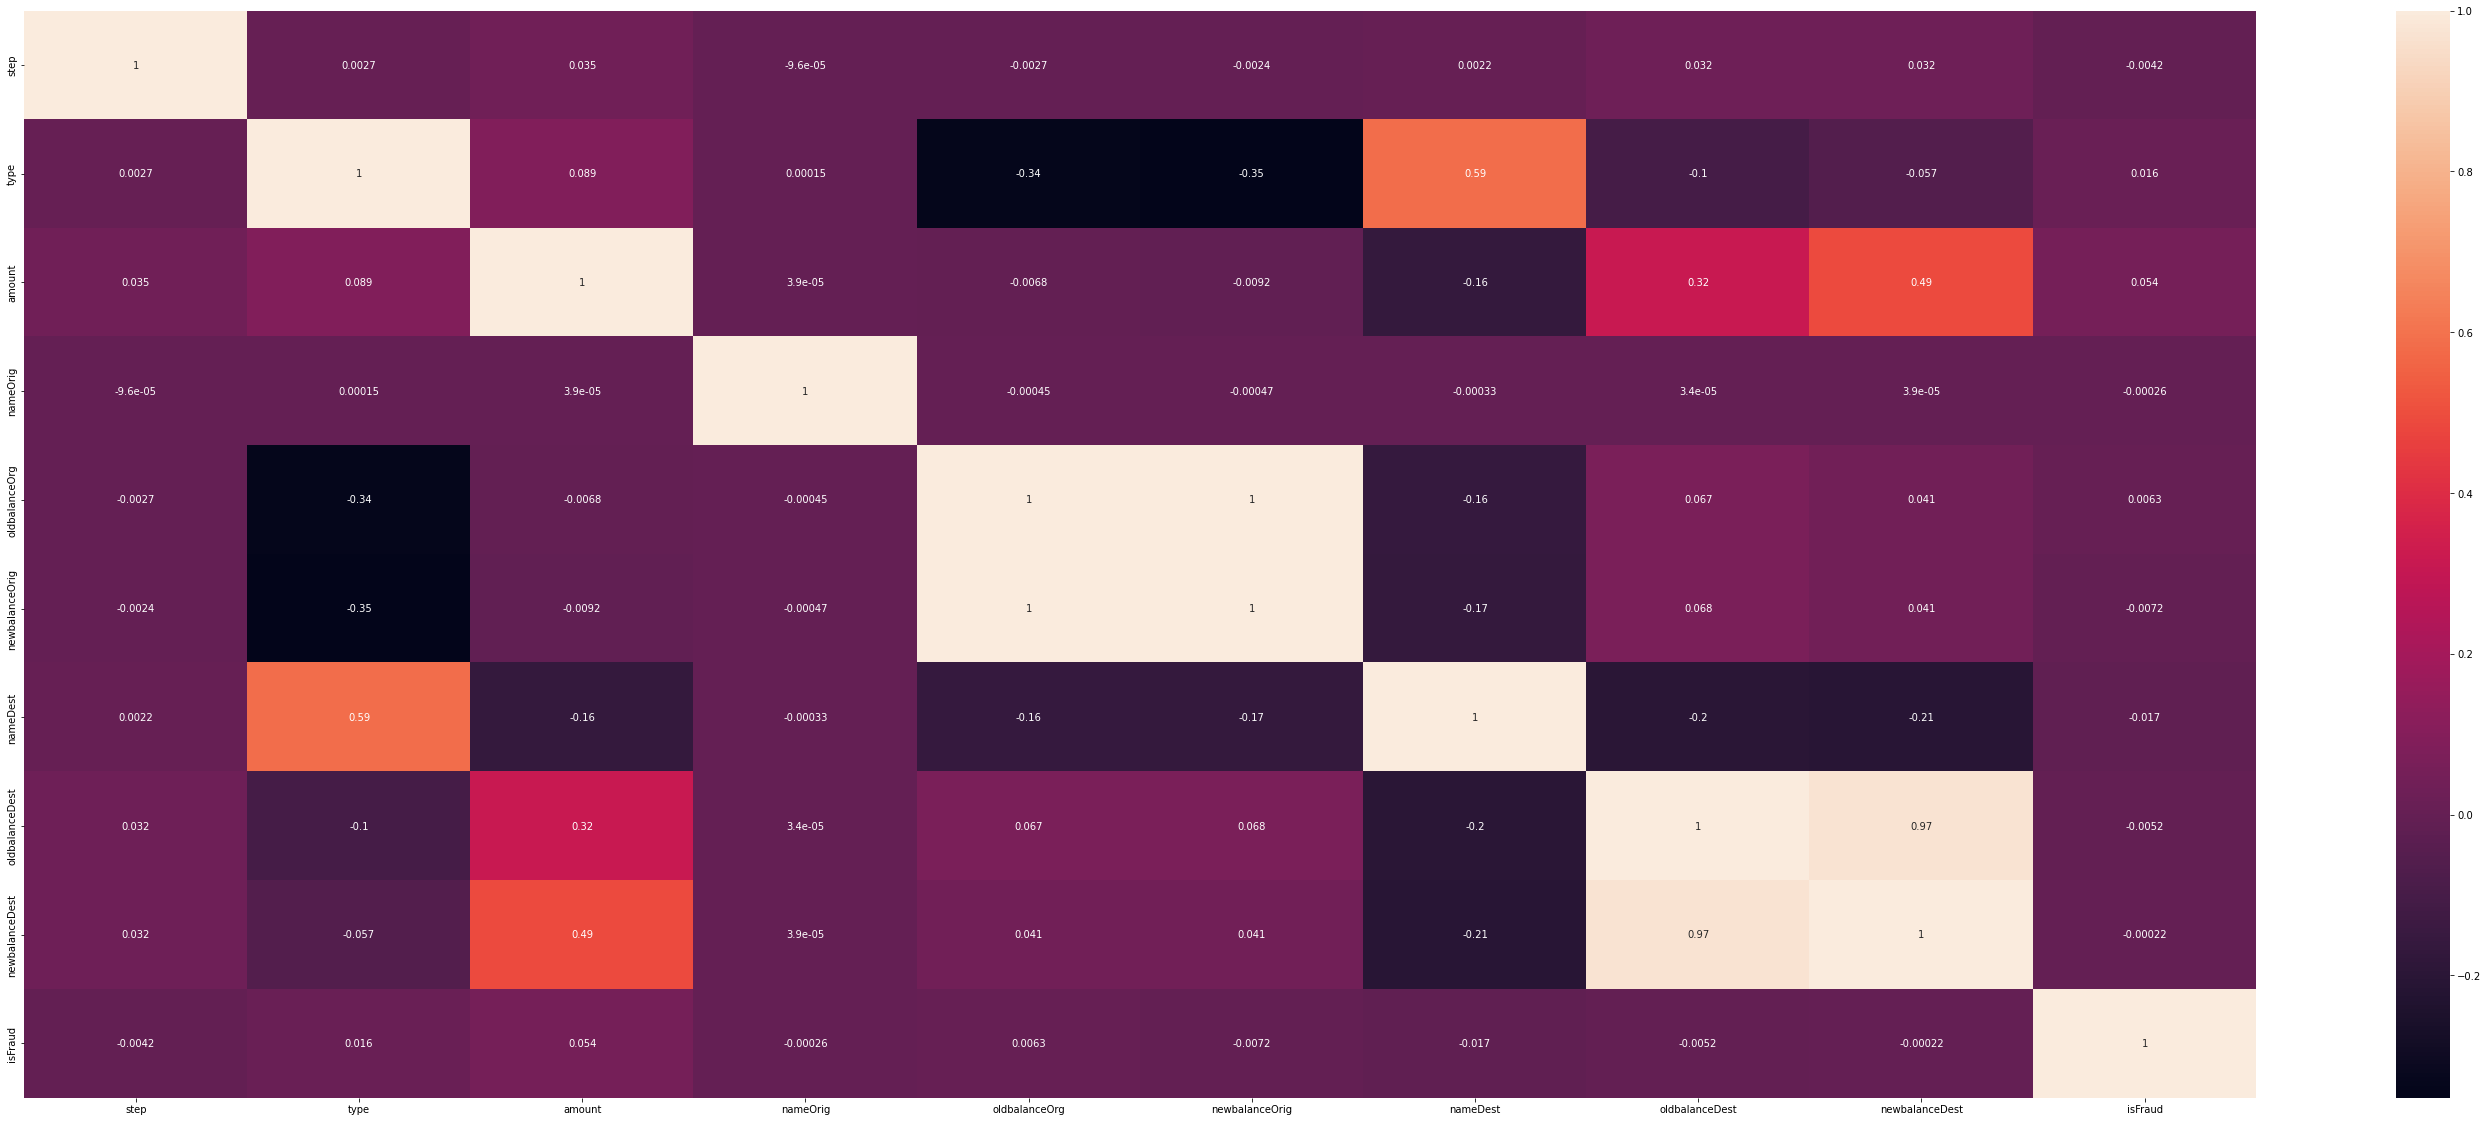

In [104]:
corr_matrix=data.corr()
features = corr_matrix.index
plt.figure(figsize=(50,20))
sns.heatmap(data[features].corr(),annot = True)

#MODEL BUILDING

In [105]:
X=data.drop(['isFraud'],axis=1)
Y=data['isFraud']

In [106]:
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [108]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
pred1=model1.predict(X_test)

In [109]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=50,criterion="entropy")
model2.fit(X_train,Y_train)
pred2=model2.predict(X_test)

In [110]:
import xgboost
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(X_train,Y_train)
pred3 = model3.predict(X_test)

[13:34:22] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [111]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,Y_train)
pred4 = model4.predict(X_test)

#MODEL COMPARSION AND EVALUATION

In [112]:
print("Confusion_matrix of Logistic Regression\n",confusion_matrix(Y_test,pred1))
print("\nClassification report of Logistic Regression\n",classification_report(Y_test,pred1))
print("\nAccuracy score of Logistic Regression",accuracy_score(Y_test,pred1)*100)
print("\nF1 score of Logistic Regression",f1_score(Y_test,pred1))
print("\nLog Loss of Logistic Regression",log_loss(Y_test,pred1))

Confusion_matrix of Logistic Regression
 [[562015     28]
 [   283    161]]

Classification report of Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    562043
           1       0.85      0.36      0.51       444

    accuracy                           1.00    562487
   macro avg       0.93      0.68      0.75    562487
weighted avg       1.00      1.00      1.00    562487


Accuracy score of Logistic Regression 99.94470983329393

F1 score of Logistic Regression 0.5086887835703002

Log Loss of Logistic Regression 0.019096586850088675


In [113]:
print("Confusion_matrix of Random Forest Classifier\n",confusion_matrix(Y_test,pred2))
print("\nClassification report of Random Forest Classifier\n",classification_report(Y_test,pred2))
print("\nAccuracy score of Random Forest Classifier",accuracy_score(Y_test,pred2)*100)
print("\nF1 score of Random Forest Classifier",f1_score(Y_test,pred2))
print("\nLog Loss of Random Forest Classifier",log_loss(Y_test,pred2))

Confusion_matrix of Random Forest Classifier
 [[562041      2]
 [   111    333]]

Classification report of Random Forest Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    562043
           1       0.99      0.75      0.85       444

    accuracy                           1.00    562487
   macro avg       1.00      0.87      0.93    562487
weighted avg       1.00      1.00      1.00    562487


Accuracy score of Random Forest Classifier 99.97991064682384

F1 score of Random Forest Classifier 0.8549422336328626

Log Loss of Random Forest Classifier 0.006938619615778369


In [114]:
print("Confusion_matrix of XGBoost Classifier\n",confusion_matrix(Y_test,pred3))
print("\nClassification report of XGBoost Classifier\n",classification_report(Y_test,pred3))
print("\nAccuracy score of XGBoost Classifier",accuracy_score(Y_test,pred3)*100)
print("\nF1 score of XGBoost Classifier",f1_score(Y_test,pred3))
print("\nLog Loss of XGBoost Classifier",log_loss(Y_test,pred3))

Confusion_matrix of XGBoost Classifier
 [[562038      5]
 [   141    303]]

Classification report of XGBoost Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    562043
           1       0.98      0.68      0.81       444

    accuracy                           1.00    562487
   macro avg       0.99      0.84      0.90    562487
weighted avg       1.00      1.00      1.00    562487


Accuracy score of XGBoost Classifier 99.97404384456885

F1 score of XGBoost Classifier 0.8058510638297872

Log Loss of XGBoost Classifier 0.008964945592777563


In [115]:
print("Confusion_matrix of Support Vector Classifier\n",confusion_matrix(Y_test,pred4))
print("\nClassification report of Support Vector Classifier\n",classification_report(Y_test,pred4))
print("\nAccuracy score of Support Vector Classifier",accuracy_score(Y_test,pred4)*100)
print("\nF1 score of Support Vector Classifier",f1_score(Y_test,pred4))
print("\nLog Loss of Support Vector Classifier",log_loss(Y_test,pred4))

Confusion_matrix of Support Vector Classifier
 [[559519   2524]
 [   363     81]]

Classification report of Support Vector Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    562043
           1       0.03      0.18      0.05       444

    accuracy                           0.99    562487
   macro avg       0.52      0.59      0.53    562487
weighted avg       1.00      0.99      1.00    562487


Accuracy score of Support Vector Classifier 99.48674369363204

F1 score of Support Vector Classifier 0.05313217448343719

Log Loss of Support Vector Classifier 0.17727603595464692


In [116]:
data.to_csv("ONLINE_PAYMENTS_MODIFIED.csv",index=False)